In [6]:
# packages
import pandas as pd
import numpy as np

import missingno as msno 

from pymongo import MongoClient

import matplotlib.pyplot as plt



In [7]:
## connecting
db_name = "meteo_paranal" # meteo_paranal_test, meteo_paranal

client = MongoClient("mongodb://localhost:27017/")
db = client[db_name] # meteo_paranal_test
collection = db[db_name]

In [98]:
## utils
numeric_col = [
   'Air Pressure at ground [hPa]',
   'Air Pressure Normalised [hPa]',
   'Air Temperature at 30m [C]',
   'Air Temperature at 2m [C]',
   'Air Temperature at ground [C]',
   'Air Temperature below VLT [C]',
   'Dew Temperature at 30m [C]',
   'Dew Temperature at 2m [C]',
   'Dew Temperature below VLT [C]',
   'Rain intensity below VLT [%]',
   'Relative Humidity at 30m [%]',
   'Relative Humidity at 2m [%]',
   'Relative Humidity below VLT [%]',
   'Wind Direction at 30m (0/360) [deg]',
   'Wind Direction at 30m (180/-180) [deg]',
   'Wind Direction at 10m (0/360) [deg]',
   'Wind Direction at 10m (180/-180) [deg]',
   'Wind Speed at 30m [m/s]',
   'Wind Speed at 10m [m/s]',
   'Wind Speed U at 20m [m/s]',
   'Wind Speed V at 20m [m/s]',
   'Wind Speed W at 20m [m/s]',
   'Air Pressure instantanous [hPa]',
   'Air Temperature instantanous at 30m [C]',
   'Air Temperature instantanous at 2m [C]',
   'Air Temperature instantanous at ground [C]',
   'Air Temperature instantaneous below VLT [C]',
   'Dew Temperature istantaneous at 30m [C]',
   'Dew Temperature instantanous at 2m [C]',
   'Dew Temperature instantanous below VLT [C]',
   'Humidity instantanous at 30m [%]',
   'Humidity instantanous at 2m [%]',
   'Humidity instantanous below VLT [%]',
   'Rain intensity instantanous [%]',
   'Wind Direction instantanous at 30m [deg]',
   'Wind Direction instantanous at 10m [deg]',
   'Wind Speed instantanous at 30m [m/s]',
   'Wind Speed instantanous at 10m [m/s]',
   'Wind Speed U instantanous at 20m [m/s]',
   'Wind Speed V instantanous at 20m [m/s]',
   'Wind Speed W instantanous at 20m [m/s]'
   'Particle (Large) at 20m [1/m^3]',
   'Particle (Large) at 10m [1/m^3]',
   'Particle (Small) at 20m [1/m^3]',
   'Particle (Small) at 10m [1/m^3]',
   'Particle (Large) Instantanous at 20m [1/m^3]',
   'Particle (Large) instantanous at 10m [1/m^3]',
   'Particle (Small) instantanous at 20m [1/m^3]',
   'Particle (Small) instantanous at 10m [1/m^3]',
 ]

def dict_to_datetime(x):
   return f"{x['year']}-{x['month']}-{x['day']} {x['hour']}:00:00"


def get_datetime_index(df):
    df['_id'] = pd.to_datetime(df['_id'].apply(dict_to_datetime))
    df = df.set_index(['_id'])
    df = df.sort_index(ascending=True)
    return df

def get_df(aggregated_expression):
    pipeline = [
        {
            "$group": {
                "_id": {
                    "year": {"$year": {"$dateFromString": {"dateString": "$Date time"}}},
                    "month": {"$month": {"$dateFromString": {"dateString": "$Date time"}}},
                    "day": {"$dayOfMonth": {"$dateFromString": {"dateString": "$Date time"}}},
                    "hour": {"$hour": {"$dateFromString": {"dateString": "$Date time"}}},
                },
                **aggregated_expression
            }
        },
        {
            "$sort": {"_id.year": 1, "_id.month": 1, "_id.day": 1, "_id.hour": 1}
        }
    ]

    result = list(collection.aggregate(pipeline))

    return pd.DataFrame(result)

In [10]:

mean_agg = {f: {"$avg": f"${f}"} for f in numeric_col}
std_agg = {f: {"$stdDevSamp": f"${f}"} for f in numeric_col}
min_agg = {f: {"$min": f"${f}"} for f in numeric_col}
max_agg = {f: {"$max": f"${f}"} for f in numeric_col}

df_mean = get_df(mean_agg)
df_std = get_df(std_agg)
df_min = get_df(min_agg)
df_max = get_df(max_agg)

df_mean = get_datetime_index(df_mean)
df_std = get_datetime_index(df_std)
df_min = get_datetime_index(df_min)
df_max = get_datetime_index(df_max)


In [11]:
df=df_mean.copy()

Text(0, 0.5, 'Datos')

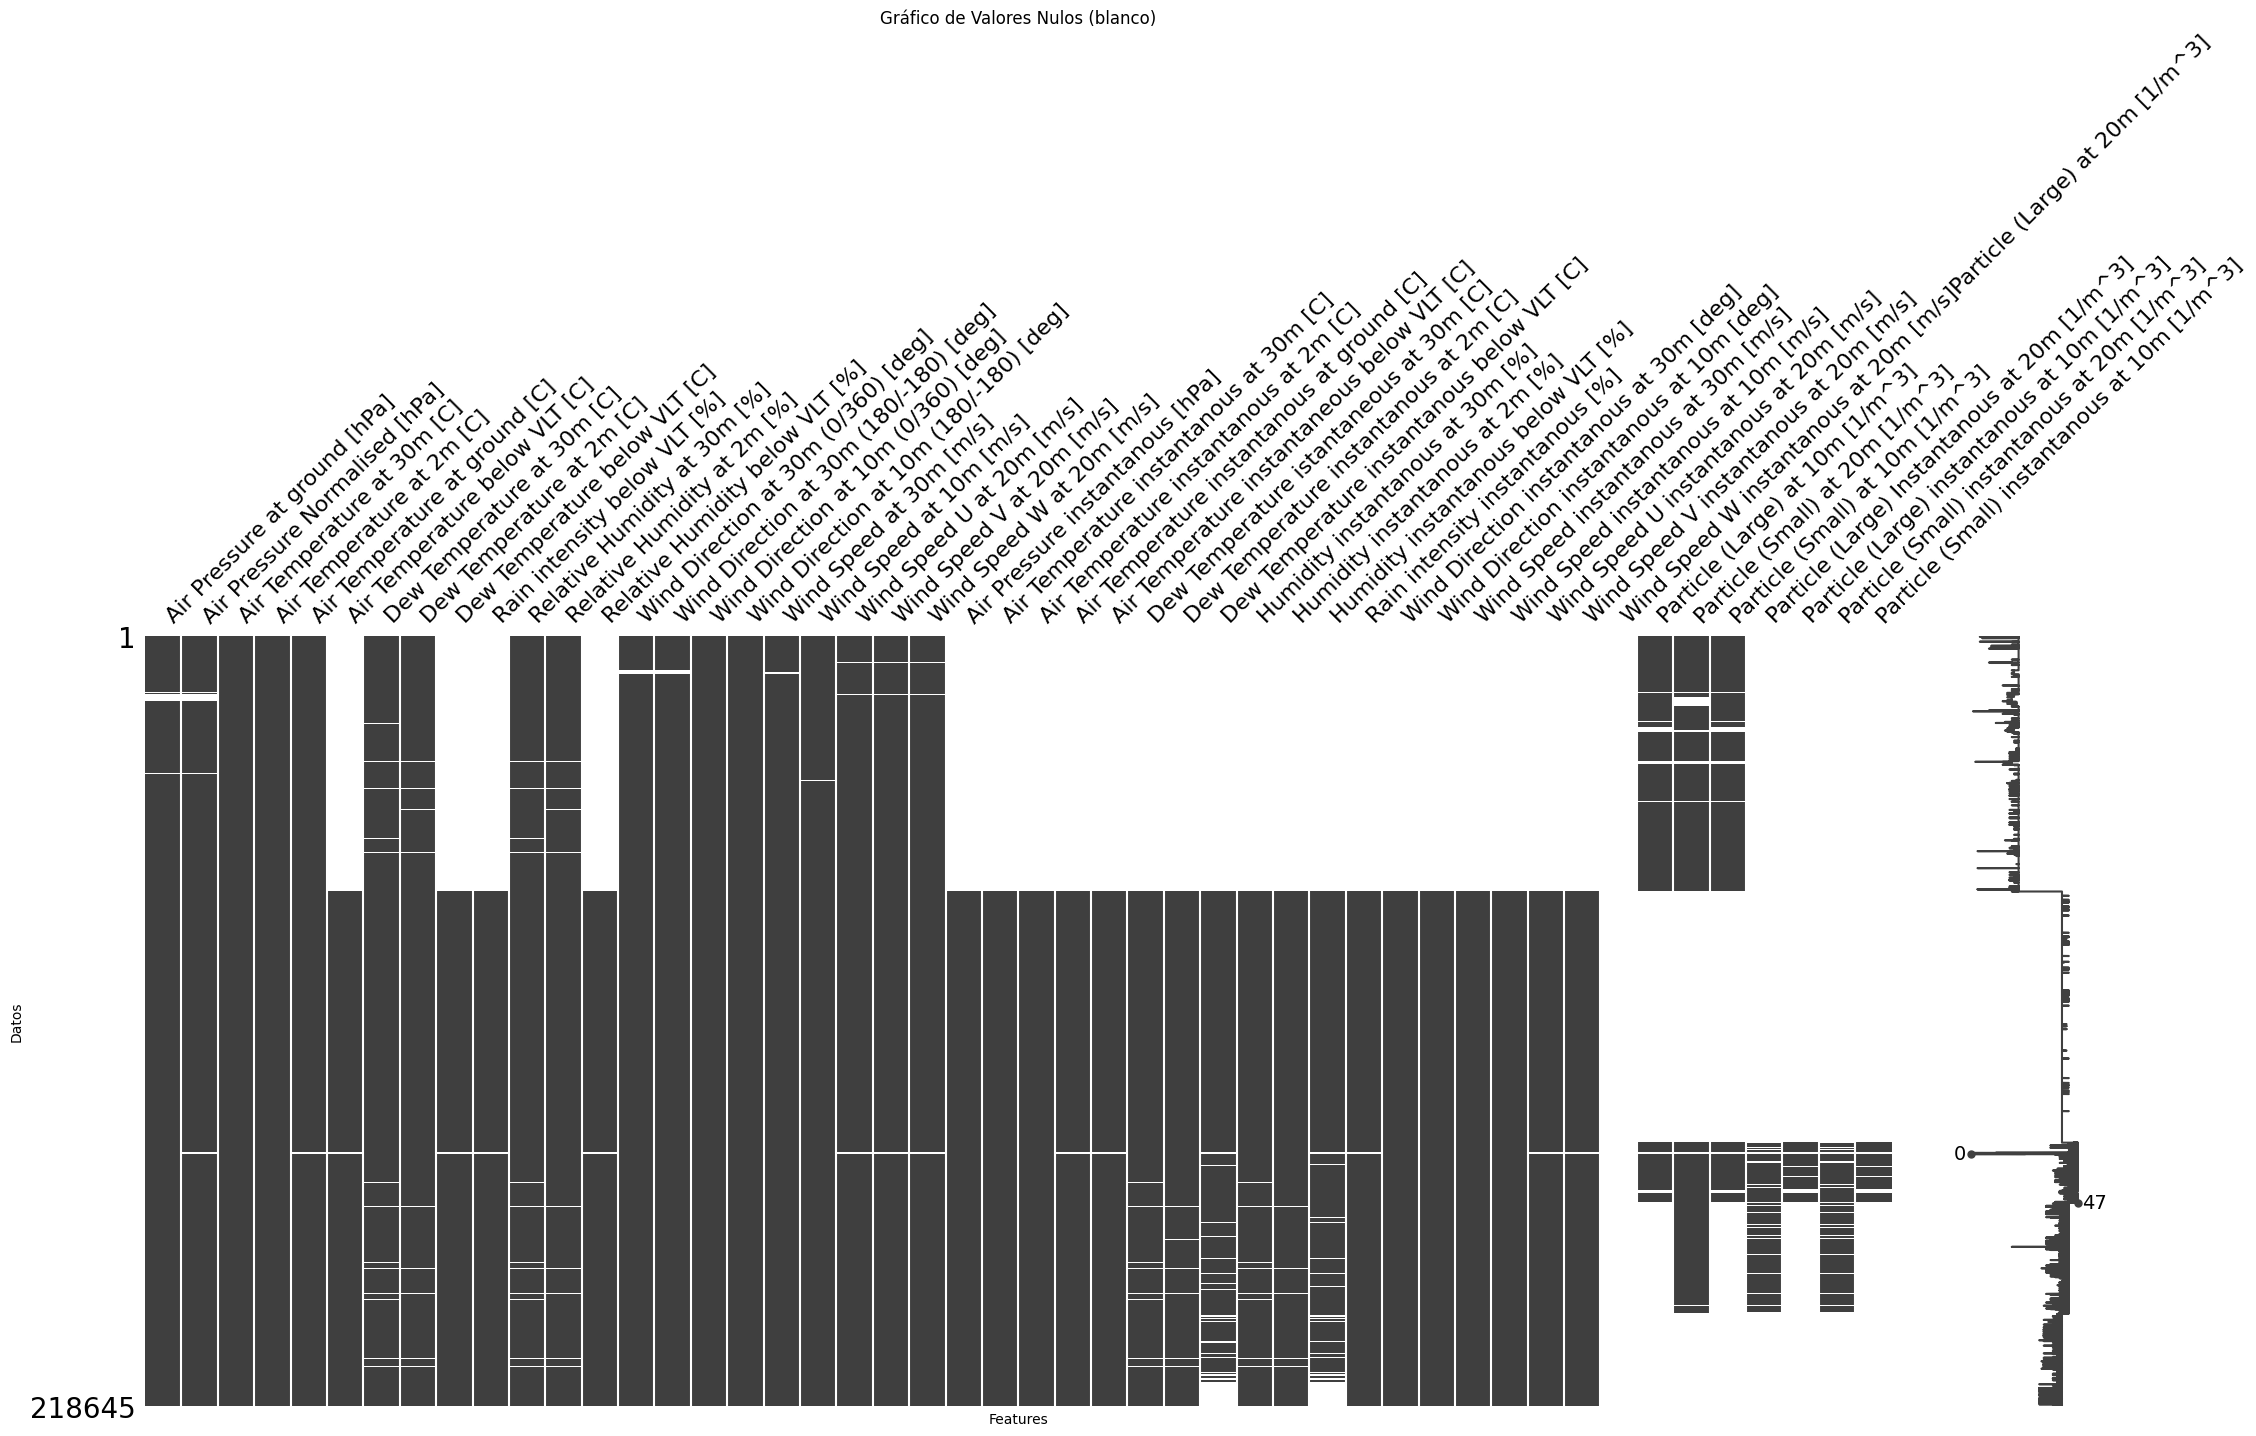

In [12]:
msno.matrix(df)
plt.title('Gráfico de Valores Nulos (blanco)')
plt.xlabel('Features')
plt.ylabel('Datos')

In [99]:
## These are variables with mostly nan values
nan_columns =   [ 'Particle (Large) at 20m [1/m^3]',
   'Particle (Large) at 10m [1/m^3]',
   'Particle (Small) at 20m [1/m^3]',
   'Particle (Small) at 10m [1/m^3]',
   'Particle (Large) Instantanous at 20m [1/m^3]',
   'Particle (Large) instantanous at 10m [1/m^3]',
   'Particle (Small) instantanous at 20m [1/m^3]',
   'Particle (Small) instantanous at 10m [1/m^3]',]

In [115]:
msno.matrix(df.loc[:'2020-08-25 12:00:00'])
plt.title('Gráfico de Valores Nulos (blanco)')
plt.xlabel('Features')
plt.ylabel('Datos')

Text(0, 0.5, 'Datos')

In [117]:
df.loc['2020-08-25 12:00:00':].isna().sum()

Air Pressure at ground [hPa]                                                 5
Air Pressure Normalised [hPa]                                                0
Air Temperature at 30m [C]                                                   0
Air Temperature at 2m [C]                                                    0
Air Temperature at ground [C]                                                0
Air Temperature below VLT [C]                                                0
Dew Temperature at 30m [C]                                                1074
Dew Temperature at 2m [C]                                                  648
Dew Temperature below VLT [C]                                               51
Rain intensity below VLT [%]                                                 0
Relative Humidity at 30m [%]                                              1074
Relative Humidity at 2m [%]                                                651
Relative Humidity below VLT [%]                     

In [14]:
# df.info()
# df.describe()


## Correlations

In [118]:
def get_principal_correlations(df_corr,n_display):

    upper_triangle_correlation = df_corr.where(np.triu(np.ones(df_corr.shape), k=1).astype(bool))
    top_positive_correlations = upper_triangle_correlation.unstack().sort_values(ascending=False)[:n_display]
    top_negative_correlations = upper_triangle_correlation.unstack().sort_values(ascending=True)[:n_display]

    rename_columns={'level_0':'feature1','level_1':'feature2',0:'Correlation'}

    less_correlated = upper_triangle_correlation.unstack().reset_index()
    less_correlated.rename(columns=rename_columns,inplace=True)
    less_correlated.Correlation=less_correlated.Correlation.apply(lambda x : abs(x))
    less_correlated= less_correlated.sort_values(by=['Correlation'],ascending=True)[less_correlated['Correlation']>0][:n_display]

    top_positive_correlations=top_positive_correlations.reset_index()
    top_positive_correlations.rename(columns=rename_columns,inplace=True)

    top_negative_correlations=top_negative_correlations.reset_index()
    top_negative_correlations.rename(columns=rename_columns,inplace=True)


    return top_negative_correlations,top_positive_correlations,less_correlated

In [150]:
top_negative_correlations,top_positive_correlations,less_correlated = get_principal_correlations(df.corr(),n_display=150)

/var/folders/b0/69vxpwp54bj58xqzl4ynkwbw0000gn/T/ipykernel_52351/756246434.py:12: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [151]:
# top_negative_correlations
top_positive_correlations
# less_correlated

feature1  \
0               Rain intensity instantanous [%]   
1    Air Temperature instantanous at ground [C]   
2       Air Temperature instantanous at 30m [C]   
3        Air Temperature instantanous at 2m [C]   
4        Dew Temperature instantanous at 2m [C]   
..                                          ...   
145                Rain intensity below VLT [%]   
146             Rain intensity instantanous [%]   
147                Rain intensity below VLT [%]   
148             Rain intensity instantanous [%]   
149     Dew Temperature istantaneous at 30m [C]   

                          feature2  Correlation  
0     Rain intensity below VLT [%]     1.000000  
1    Air Temperature at ground [C]     0.999999  
2       Air Temperature at 30m [C]     0.999997  
3        Air Temperature at 2m [C]     0.999994  
4        Dew Temperature at 2m [C]     0.999990  
..                             ...          ...  
145      Dew Temperature at 2m [C]     0.494296  
146      Dew Temperature at 2m [C]     0.494296  
147  Dew Temperature below VLT [C]     0.482710  
148  Dew Temperature below VLT [C]     0.482710  
149   Rain intensity below VLT [%]     0.480660  

[150 rows x 3 columns]

# Plot Analysis

In [15]:
import holoviews as hv
from holoviews import opts
import hvplot.pandas

hv.extension('bokeh', 'matplotlib')

## Histogram

In [96]:
# histogram per variables 
def create_histogram(variable):
    return df.hvplot.hist(y=variable, bins=200, title=f'Histogram of {variable}')

variables_list = numeric_col
histogram_dmap = hv.DynamicMap(create_histogram, kdims=['variable']).redim.values(variable=variables_list)
layout = histogram_dmap.opts(framewise=True)
layout

BokehModel(combine_events=True, render_bundle={'docs_json': {'017ba891-10bf-41fd-9284-7b7982cbc3b5': {'version…

## Time Series plot

In [17]:
def create_timeseries(variable):
    return df.hvplot.line(y=variable, title=f'Time Series of {variable}')

variables_list = numeric_col

# creates a dropdorwn menu according to variables
timeseries_dmap = hv.DynamicMap(create_timeseries, kdims=['variable']).redim.values(variable=variables_list)

layout = timeseries_dmap.opts(framewise=True)
layout

BokehModel(combine_events=True, render_bundle={'docs_json': {'87190501-8fac-4410-91e6-a30b24308019': {'version…

## Time Series per year

In [61]:
import plotly.express as px

# Plot using Plotly Express
fig = px.line(df, x=df.index.dayofyear, y='Air Pressure at ground [hPa]', color='Year', line_group='Year',
              labels={'year': 'Year', 'date': 'Day of Year'},
              title='Variation Over Time',
              template='plotly_dark')

fig.show()